# NSCI0007 Exam
## Answers

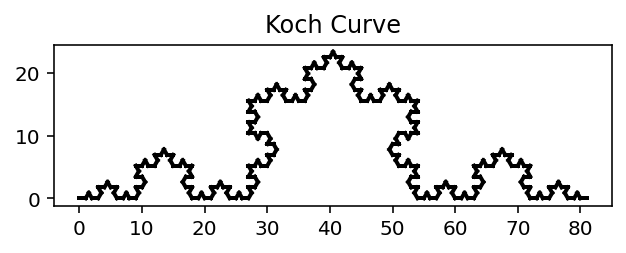

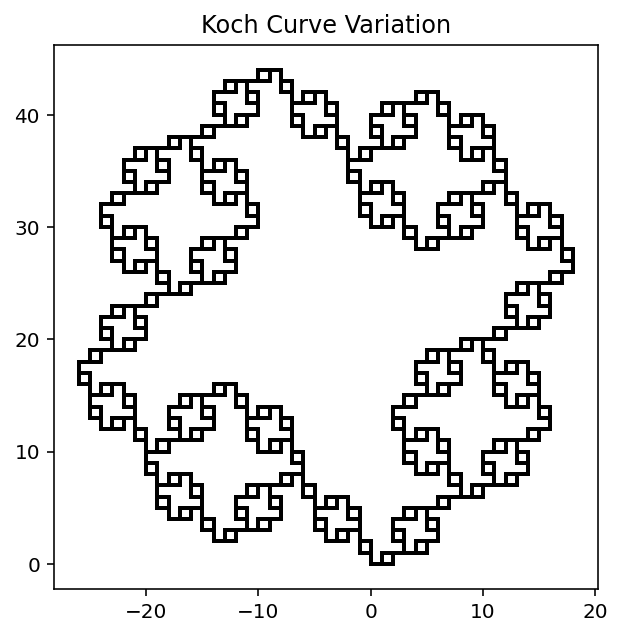

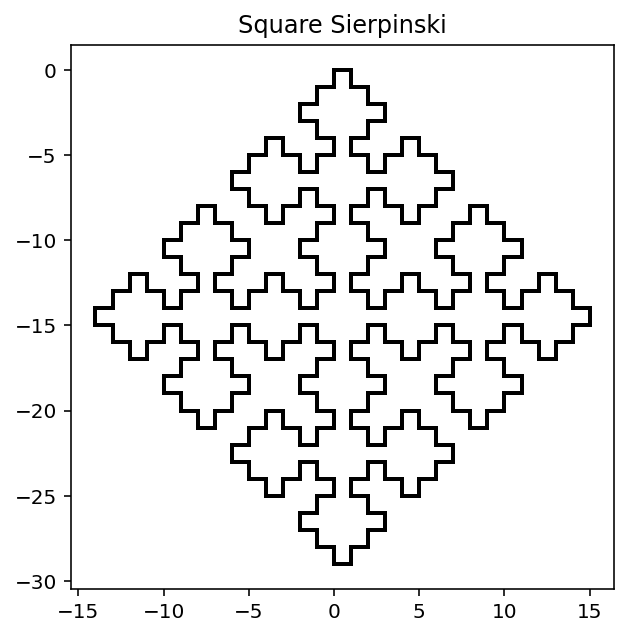

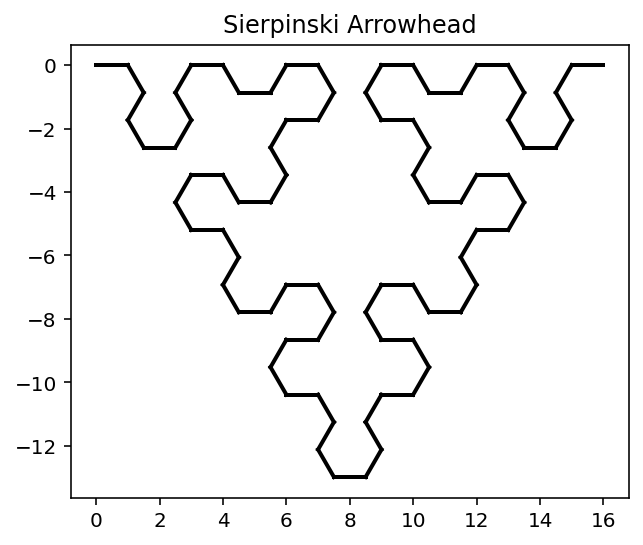

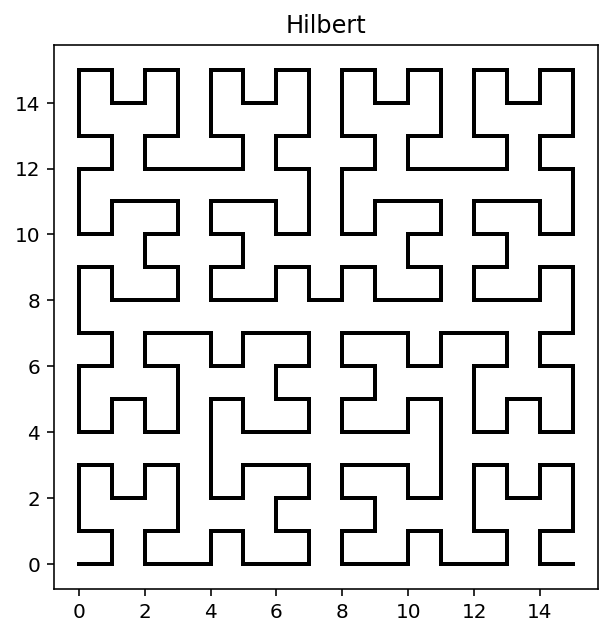

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import csv

#Q1
def start(theta):
    state[0] = 0
    state[1] = 0
    state[2] = 0
    state[3] = theta
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    
def draw_forward():
    x = state[0]
    y = state[1]
    angle = state[2]
    state[0] = x + np.cos(angle)
    state[1] = y + np.sin(angle)
    plt.plot([x, state[0]], [y, state[1]], color="black",
    linewidth=2)
    
def rotate_left():
    theta = state[3]
    state[2] = state[2] + theta * np.pi / 180
    
def rotate_right():
    theta = state[3]
    state[2] =  state[2] - theta * np.pi / 180


state = [0, 0, 0, 0]
# Example: draw an L

def Q1():
    start(60)
    draw_forward()
    rotate_left()
    draw_forward()
    rotate_right() ; rotate_right()
    draw_forward()
    rotate_left()
    draw_forward()
    plt.title("Question 1")

    
#Q2
def draw_sequence(seq, angle):
    start(angle)
    for elem in seq:
        if elem == "F":
            draw_forward()
        elif elem == "+":
            rotate_right()
        elif elem == "-":
            rotate_left()
        else:
            continue

#Q3
def apply_koch_rule(seq):
    return seq.replace("F", "F-F++F-F")


def test_apply_koch_rule():
    s = apply_koch_rule("XFAF")
    assert(s =="XF-F++F-FAF-F++F-F"), "{}: apply koch rule fail".format(s)
    print(s, "apply koch rule pass")

#Q4
def draw_koch_curve(seq, times):
    for i in range(times):
        seq = apply_koch_rule(seq)
    draw_sequence(seq, 60)


def Q4():
    #draw iterations of 0 1 2 of Koch Curve
    seq = "F"
    num = [i for i in range(3)]
    for i in range(0,3):
        draw_koch_curve(seq, i)
        plt.title("Koch Curve Iteration " + str(i) )


#Q5
def apply_hilbert_rules(seq):
    ret_s = ""
    for elem in seq:
        if elem == "X":
            c1 = elem.replace("X", "-YF+XFX+FY-")
            ret_s = ret_s + c1
        elif elem == "Y":
            c2 = elem.replace("Y", "+XF-YFY-FX+")
            ret_s = ret_s + c2
        else:
            ret_s = ret_s + elem
    return ret_s

        
def test_apply_hilbert_rules():
    s = apply_hilbert_rules("XY")
    assert(s == "-YF+XFX+FY-+XF-YFY-FX+"), "{}: Failed apply_hilbert_rules".format(s)
    print(s, "apply_hilbert_rules pass")

def draw_hilbert_curve(seq, times):
    for i in range(times):
        seq = apply_hilbert_rules(seq)
    draw_sequence(seq, 90)
#     print(seq)
    
def Q5(seq, times):
    # Draw iterations 1, 2 and 3 of the Hilbert curve
    for i in range(1,times+1):
        draw_hilbert_curve(seq, i)
        plt.title("Hilbert Cruve with axiom \"" + str(seq) + "\" Iteration " + str(i))


#Q6
def apply_rules(seq, rule_list):
    rule_dict = {}
    for rules in rule_list:
        rule = rules.split("->")
        initial = rule[0]
        final = rule[1]
        rule_dict[initial] = final
#     print(rule_dict)
    ret_seq = ""
    for elem in seq:
        if elem in rule_dict.keys():
            change = elem.replace(elem, rule_dict[elem])
            ret_seq = ret_seq + change
        else:
            ret_seq = ret_seq + elem
    return ret_seq

def test_apply_rules():
    s1 = apply_rules("AB", ["A->AB", "B->BA"])
    s2 = apply_rules("AB", ["A->XY", "B->XZ"])
    assert(s1 == "ABBA" and s2 == "XYXZ"), "apply rules failed"
    print(s1, s2, "pass apply rules\n")


#Q7
def getData():
    with open("lsysdata.txt") as f:
        b = csv.reader(f)
        next(b)
        line = [i for i in b]
        name = [str(row[0]) for row in line]
        iteration = [int(row[1]) for row in line]
        angle = [int(row[2]) for row in line]
        axiom = [str(row[3]) for row in line]
        rules = [list(row[4:]) for row in line]
#     print("Name: {} \n iteration: {}\n Angle: {}\n axiom: {} \n rules: {}\n".format(name, iteration, angle, axiom,rules))
    return name, iteration, angle, axiom, rules
        

def draw_l_system(title, axiom, theta, rule_list, n):
    seq = axiom
    for i in range(n):
        seq = apply_rules(seq, rule_list)
#     print(seq)
    draw_sequence(seq, theta)
    plt.title(title)
    
def Q7():
    data = getData()
    name = data[0]
    iteration = data[1]
    angle = data[2]
    axiom = data[3]
    rules = data[4]
#     print(rules)
    for i in range(len(name)):
        draw_l_system(name[i], axiom[i], angle[i], rules[i], iteration[i])

# def test():
#     Q1() #q1 
#     draw_sequence("F-F++F-F", 60) #q2 
#     test_apply_koch_rule() #q3 
#     Q4() #q4 ok
#     test_apply_hilbert_rules() #q5 
#     Q5("X", 3) #q5 
#     Q5("Y", 3) #q5
#     test_apply_rules() #q6 ok

def main():
    Q7() #q7
    

if __name__ == "__main__":
    main()
    

Question 1

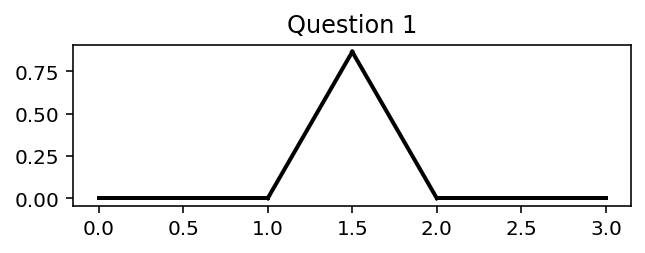

In [17]:
Q1()

Question 2

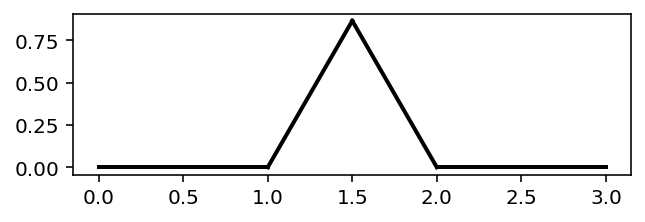

In [18]:
draw_sequence("F-F++F-F", 60)

Question 3

In [19]:
test_apply_koch_rule()

XF-F++F-FAF-F++F-F apply koch rule pass


Question 4

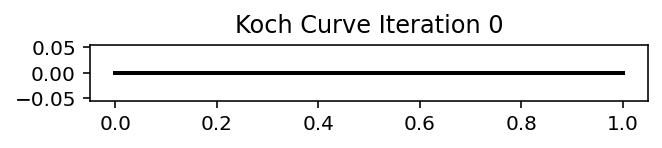

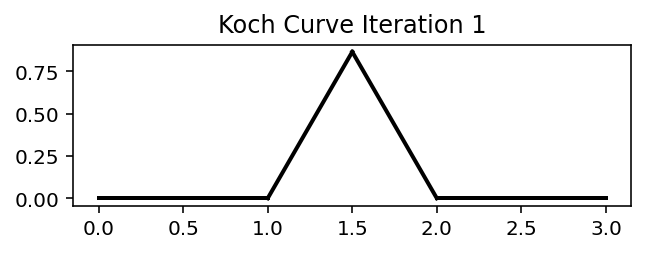

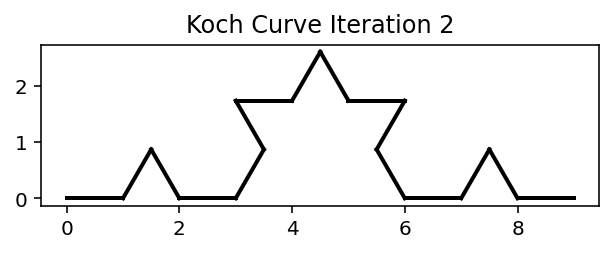

In [20]:
Q4()

Question 5

-YF+XFX+FY-+XF-YFY-FX+ apply_hilbert_rules pass


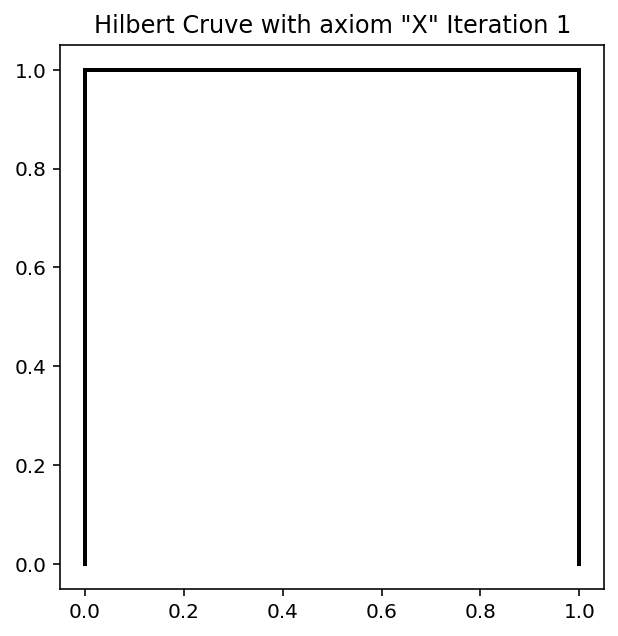

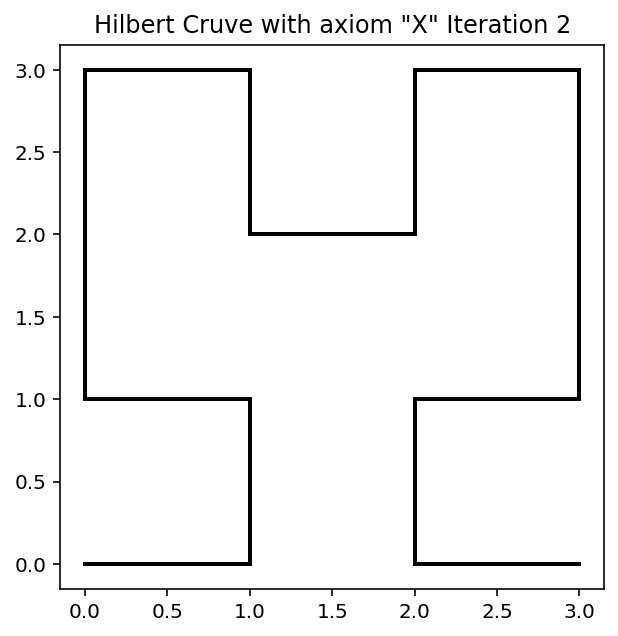

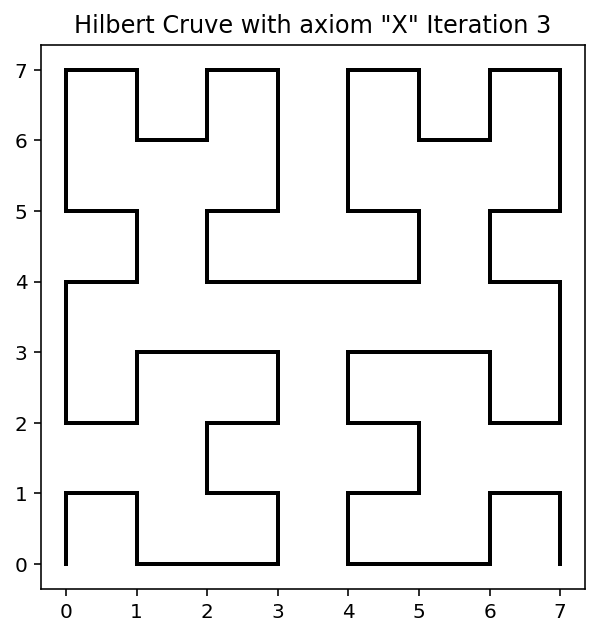

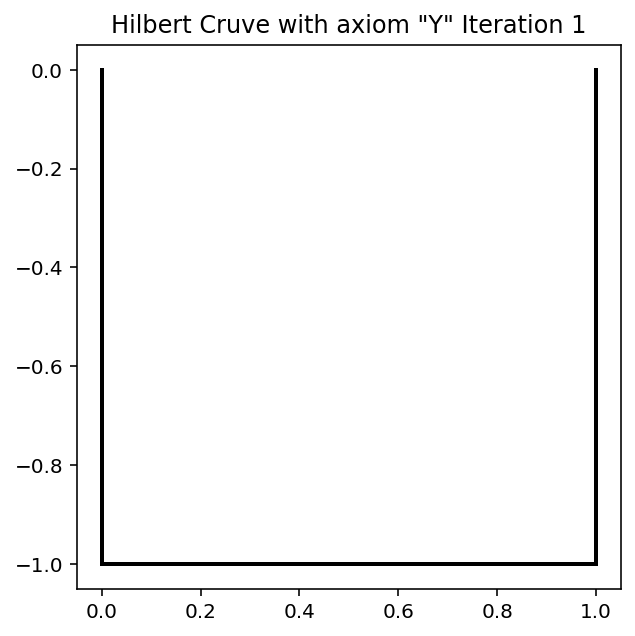

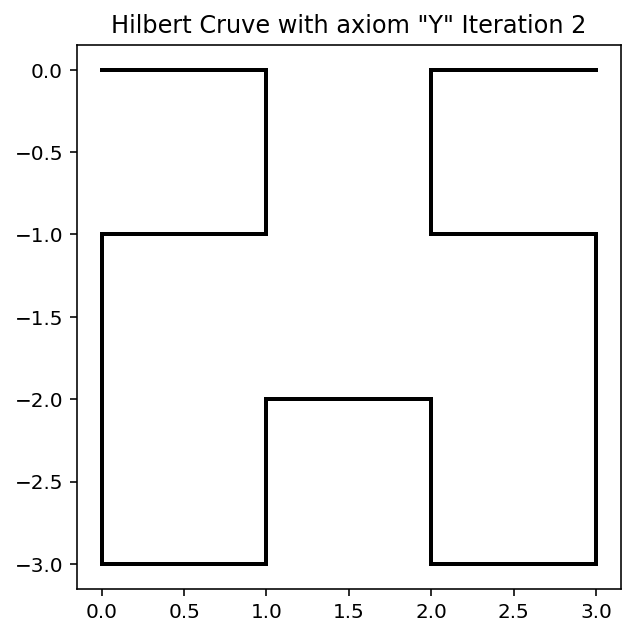

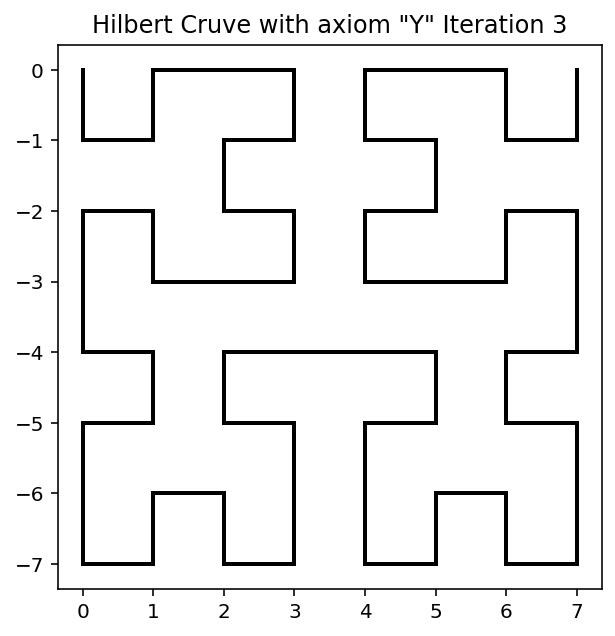

In [21]:
test_apply_hilbert_rules()
Q5("X", 3) 
Q5("Y", 3) 

Question 6


In [22]:
test_apply_rules()

ABBA XYXZ pass apply rules



Question 7

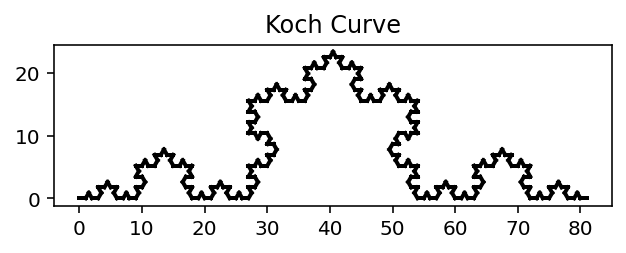

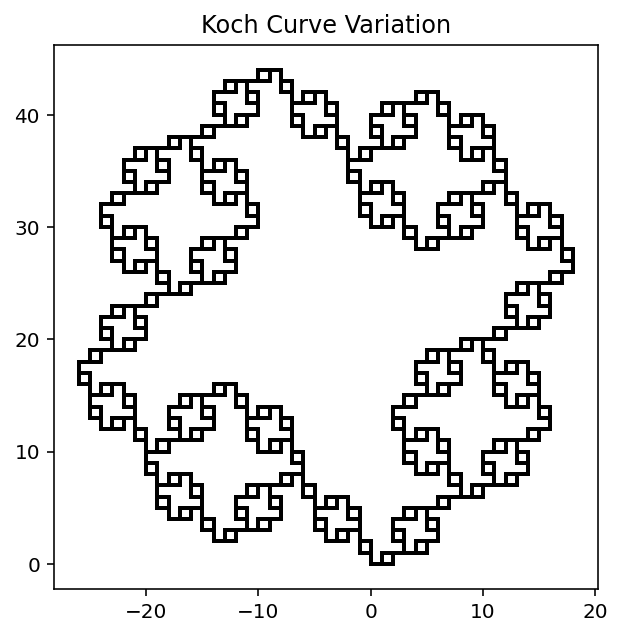

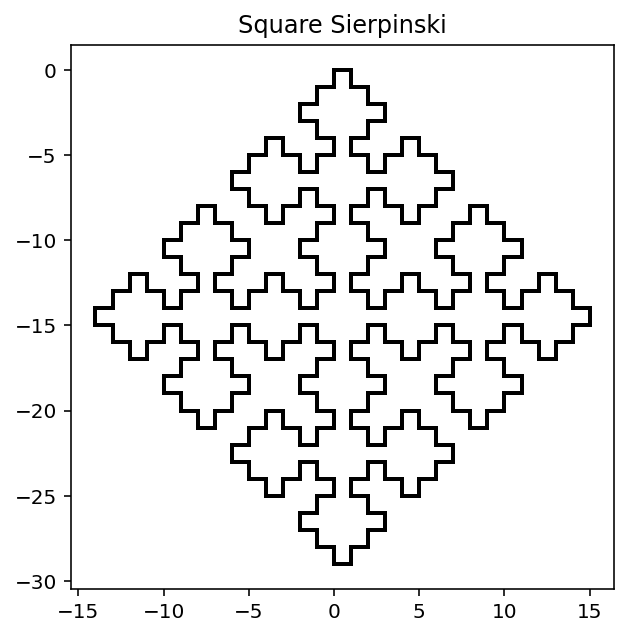

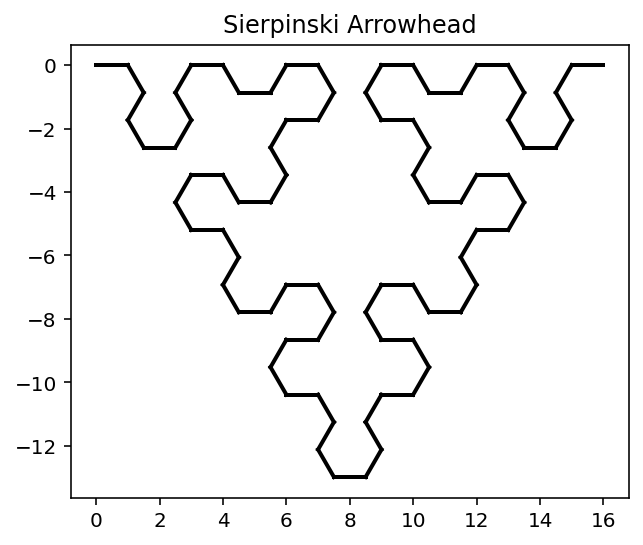

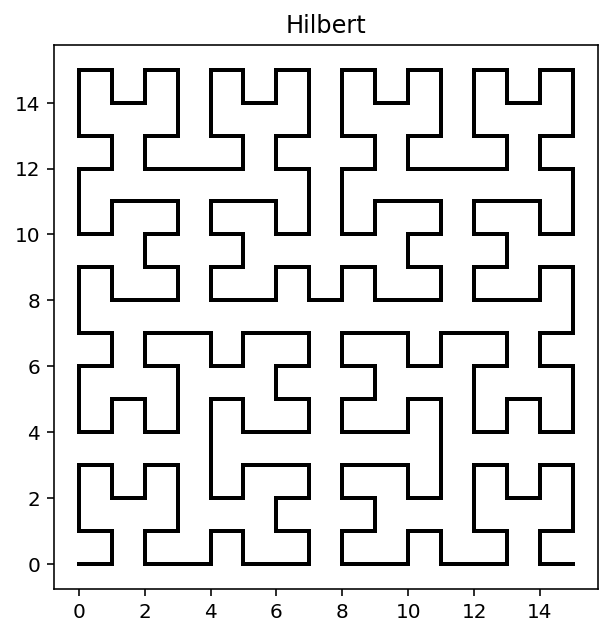

In [23]:
 Q7()